<a href="https://colab.research.google.com/github/KTB2110/PortfolioProjects/blob/Projects/Sales_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Sales Data Analysis**

The directory contains fifty CSV files (one per week) of timestamped sales data. Each row in a file has two columns:

sale_time - The timestamp on which the sale was made e.g. 2012-10-01 01:42:22

purchaser_gender - The gender of the person who purchased (male or female)

#### **Questions to Answer**

1.   Plot daily sales for all 50 weeks.
2.   It looks like there has been a sudden change in daily sales. What date did it occur?
1.   Is the change in daily sales at the date you selected statistically significant? If so, what is the p-value?
2.   Does the data suggest that the change in daily sales is due to a shift in the proportion of male-vs-female customers? Please use plots to support your answer (a rigorous statistical analysis is not necessary).

1.   Assume a given day is divided into four dayparts: night (12:00AM - 6:00AM), morning (6:00AM - 12:00PM), afternoon (12:00PM - 6:00PM) and evening (6:00PM - 12:00AM). What is the percentage of sales in each daypart over all 50 weeks?




Importing libraries

In [32]:
import pandas as pd
import matplotlib.pyplot as plt 
import glob

In [33]:
# Assigning a constant figure size
FIG_SIZE = (8,6)

### **Question 1**

##### **1. Plotting daily sales for all 50 weeks**

In [34]:
l = [pd.read_csv(filename) for filename in glob.glob("*.csv")]
df = pd.concat(l, axis=0)
df.head()

,sale_time,purchaser_gender
0,2012-10-22 01:07:17,female
1,2012-10-22 01:58:49,female
2,2012-10-22 02:23:55,female
3,2012-10-22 02:26:58,female
4,2012-10-22 02:31:35,female


Since, we are only concerned with the days, I will convert the sales column to datetime.

In [35]:
sale_day = pd.to_datetime(df['sale_time'])

To get the sum of sales per day, I can now floor the sale_date column and use it in a group by function to get the number of sales per day.

In [36]:
sales_per_day = sale_day.groupby(sale_day.dt.floor('d')).size().reset_index(name = 'number_of_sales')
sales_per_day.rename(columns={'sale_time':'sale_day'},inplace=True)
sales_per_day.head()

,sale_day,number_of_sales
0,2012-10-01,514
1,2012-10-02,482
2,2012-10-03,499
3,2012-10-04,546
4,2012-10-05,476


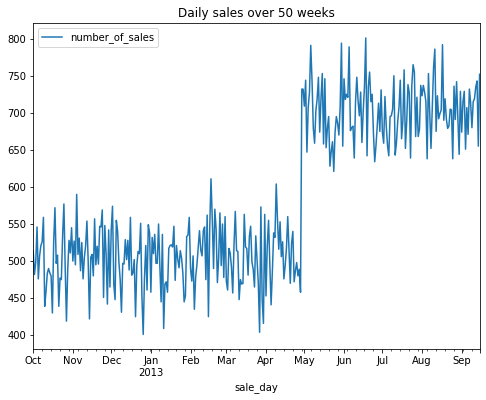

In [37]:
sales_per_day.index = sales_per_day['sale_day']
sales_per_day.drop(columns=['sale_day'], inplace=True)

#  plotting the daily number of sales for all 50 weeks
sales_per_day.plot(figsize=FIG_SIZE, title = "Daily sales over 50 weeks")
plt.show()

### **Question 2**

**Looking at the above graph, there is a clear and very sudden change in the daily sales. Let's look at where this occured**

In [38]:
sales_per_day['num_sales_previous_day'] = sales_per_day['number_of_sales'].shift(1)
sales_per_day['change from previous day'] = sales_per_day['number_of_sales'] -  sales_per_day['num_sales_previous_day']
sales_per_day.head()

,number_of_sales,num_sales_previous_day,change from previous day
sale_day,,,
2012-10-01,514,NaN,NaN
2012-10-02,482,514.0,-32.0
2012-10-03,499,482.0,17.0
2012-10-04,546,499.0,47.0
2012-10-05,476,546.0,-70.0


In [39]:
sales_per_day[sales_per_day.index == sales_per_day['change from previous day'].idxmax()]

,number_of_sales,num_sales_previous_day,change from previous day
sale_day,,,
2013-04-29,732,458.0,274.0


Looks like august 29th was the day the sudden change in number of sales took place. There were 274 more sales on August 29th compared to August 28th

### **Question 3**

**Finding the p-value of the change in daily sales on that date to check if it is statistically significant in our case.**

In [41]:
from scipy import stats
#scipy.stats will help us obtain the p-value by implementing a t-test function on our dataset.

#Preprocessing of dataframe
sales_per_day.dropna(inplace=True)

stats.ttest_1samp(sales_per_day['number_of_sales'], 732)

Ttest_1sampResult(statistic=-26.273266340051002, pvalue=1.3019593251472396e-84)

The p-value we get is 1.3 * 10^(-84). Since p < 0.05 (we can assume the threshold as 0.05 as common practice), it signifies that this particular date is statistically significant

### **Question 4**

**The questions asks to investigate whether or not this sudden change was in any capacity due to a shift in the proportion of male-vs-female customers?**
I will use a plot to further dive into whether or not this might be the case.

In [48]:
df['sale_day'] = pd.to_datetime(df['sale_time']).dt.floor('d')
gender_proportions_df = df.groupby(['sale_day', 'purchaser_gender']).size().reset_index()
gender_proportions_df

,sale_day,purchaser_gender,0
0,2012-10-01,female,413
1,2012-10-01,male,101
2,2012-10-02,female,379
3,2012-10-02,male,103
4,2012-10-03,female,386
...,...,...,...
695,2013-09-13,male,537
696,2013-09-14,female,193
697,2013-09-14,male,462
698,2013-09-15,female,230


Converting above dataframe from long format to wide format for further manipulation

In [49]:
new_df = gender_proportions_df[gender_proportions_df['purchaser_gender'] == 'male'].merge(gender_proportions_df[gender_proportions_df['purchaser_gender'] == 'female'], on = 'sale_day')

In [51]:
new_df.rename(columns={'0_x':'male_sales', '0_y':'female_sales'}, inplace=True)
new_df.drop(columns=['purchaser_gender_x', 'purchaser_gender_y'], inplace=True)
new_df

,sale_day,male_sales,female_sales
0,2012-10-01,101,413
1,2012-10-02,103,379
2,2012-10-03,113,386
3,2012-10-04,114,432
4,2012-10-05,108,368
...,...,...,...
345,2013-09-11,495,224
346,2013-09-12,510,225
347,2013-09-13,537,206
348,2013-09-14,462,193


In [55]:
new_df['gender_ratio'] = new_df['male_sales']/new_df['female_sales']

**Graphical method**

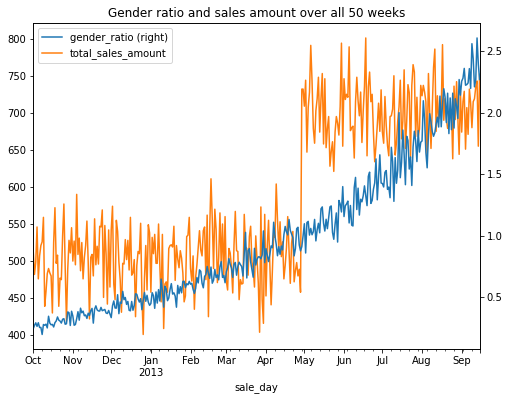

In [56]:
# plotting gender ratio change over 50 weeks with the total number of sales per day
# Plotting them in the same graph to observe any correlation
plot_df = new_df.copy()
plot_df['total_sales_amount']  = plot_df['male_sales'] + plot_df['female_sales']
plot_df.drop(columns=['female_sales', 'male_sales'], inplace=True)
plot_df.index = plot_df['sale_day']
plot_df.drop(columns=['sale_day'], inplace=True)
plot_df.plot(secondary_y = ['gender_ratio'],figsize=FIG_SIZE, title= "Gender ratio and sales amount over all 50 weeks")
plt.show()

The gender-ratio does not seem to have any influence on the number of sales per day and thus it is unlikely that this feature has caused the sudden change in the number of daily sales.

**Statistical Technique**

In [58]:
# other way of checking correlation
new_df['total_sales_amount'] = new_df['male_sales'] + new_df['female_sales']
new_df['num_sales_previous_day'] = new_df['total_sales_amount'].shift(1)
new_df['change from previous day'] = new_df['total_sales_amount'] - new_df['num_sales_previous_day']

In [59]:
new_df['change from previous day'].corr(new_df['gender_ratio'])

0.0018458281303773154

With the value obtained from the correlation function very low, it is clear to see that gender ratio has no correlation with the sudden change in daily sales.

With it being clear that gender ratio did not have any influence on the daily sales, there must be another reason for this sudden change. Some potential reasons could be the implementation of a new marketing campaign or a global pandemic that might have caused online sales to sky rocket.

### **Question 5**

**What is the percentage of sales in each daypart over all 50 weeks?**

In [75]:
df.sale_time = pd.to_datetime(df.sale_time)

bins = [-1, 6, 12, 18, 24]
labels = ['night', 'morning', 'afternoon', 'evening']

df['daypart'] = pd.cut(df['sale_time'].dt.ceil('h').dt.hour, bins,labels=labels)
df_pct = df.groupby('daypart').size().reset_index()
df_pct['percentage'] = df_pct[0]/df_pct[0].sum() * 100
df_pct.rename(columns={0:'count'}, inplace=True)

In [76]:
df_pct

,daypart,count,percentage
0,night,19814,9.697106
1,morning,62873,30.770473
2,afternoon,80531,39.412418
3,evening,41111,20.120003
